# Spherical

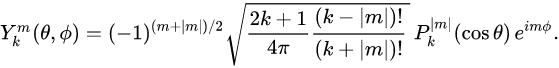

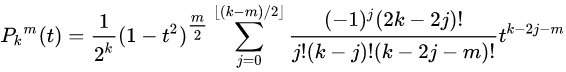

1. 水素原子の波動関数(角度部分)を求める
   1. view Legendre Polynomials
1. 水素原子の波動関数(動径部分)を求める
1. 水素原子の波動関数を求める
   1. view s軌道
   1. view p軌道
   1. view d軌道
   1. view f軌道

In [21]:
m=float(1)
k=float(4)

In [22]:
import math
sign=math.pow(-1, (m + math.fabs(m))/2)
coeff=math.pow((2*k+1)*math.factorial(k-math.fabs(m))/(4*math.pi*math.factorial(k+math.fabs(m))), 0.5)

def legendre_polynomial_builder(_m,_k):
    a = math.pow(0.5, _k)
    b = _m/2
    c = [math.pow(-1,j) * math.factorial(2*_k-2*j) / (math.factorial(j) * math.factorial(_k-j) * math.factorial(_k-2*j-_m))  for j in range(1+math.floor((_k-_m)/2))]
    #print(f"P({_m}, {_k}): {a} {b} {c}")
    return lambda t: math.pow(0.5, _k) * math.pow((1-t*t), _m/2) * sum([math.pow(-1,j) * math.factorial(2*_k-2*j) * math.pow(t, _k-2*j-_m) / (math.factorial(j) * math.factorial(_k-j) * math.factorial(_k-2*j-_m))  for j in range(1+math.floor((_k-_m)/2))])
legendre_polynomial=legendre_polynomial_builder(m,k)

print(f"m={m} k={k} sign={'+' if sign>0 else '-'}({sign}) coeff={coeff}")

m=1.0 k=4.0 sign=-(-1.0) coeff=0.18923493915151202


In [23]:
theta_phi = [(2*math.pi*i/36, 2*math.pi*j/36) for i in range(36) for j in range(36)]

y = [(sign*coeff*legendre_polynomial(math.cos(t)), math.cos(m*p), math.sin(m*p)) for (t,p) in theta_phi]

# 1: 水素関数の波動関数(角度部分)
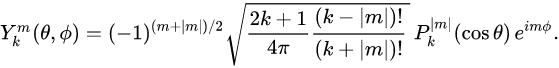

In [24]:
%matplotlib notebook

In [25]:
def y_mk(m, k, theta, phi):
    Y = math.pow(-1, (m+math.fabs(m))/2) * math.pow((2*k+1)*math.factorial(k-math.fabs(m)) / (4*math.pi*math.factorial(k+math.fabs(m))), 0.5) * legendre_polynomial_builder(math.fabs(m), k)(math.cos(theta))
    return (Y*math.cos(m*phi), Y*math.sin(m*phi))

theta_phi = [(2*math.pi*i/36, 2*math.pi*j/36) for i in range(36) for j in range(36)]
xyz_ymk_00 = [(math.sin(theta)*math.cos(phi), math.sin(theta)*math.sin(phi), math.cos(theta), y_mk(0,0,theta,0)[0]) for (theta,phi) in theta_phi]

import numpy as np

nsep=360
thetas = np.arange(0, 0.5*math.pi, math.pi/nsep)
phis = np.arange(0, 0.5*math.pi, math.pi/nsep)
X, Y = np.meshgrid(thetas, phis)

xs = np.sin(X) * np.cos(Y)
ys = np.sin(X) * np.sin(Y)
zs = np.cos(X)
cs = np.vectorize(lambda theta: y_mk(0,2,theta,0)[0])(X).flatten()

In [26]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


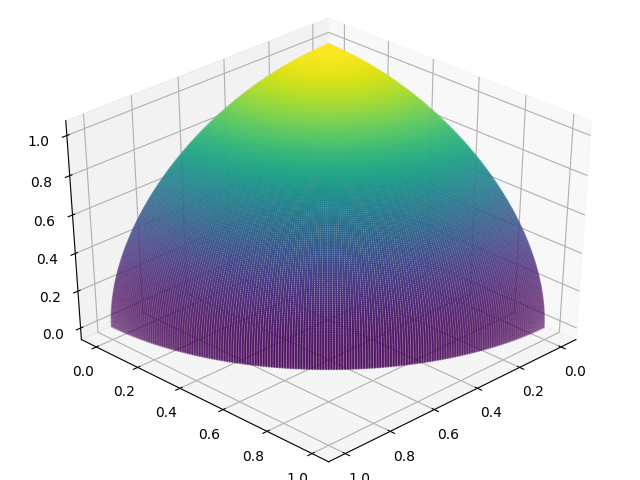

In [27]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(elev=36, azim=45)
ax.scatter(xs,ys,zs,c=cs,s=1)

plt.show()

# 1-A: Drawing Legendre Polynomial for each (m,k)

In [28]:
def draw(_m):
    for i in range(_m, _m+5):
        test = legendre_polynomial_builder(_m,i)
        # plt.plot([math.cos(math.pi*x/360) for x in range(360)], [test(math.cos(math.pi*x/360)) for x in range(360)], label=f"m={m}")

draw(0)

In [29]:
draw(1)

In [30]:
draw(2)

# Links

- https://ja.wikipedia.org/wiki/%E7%90%83%E9%9D%A2%E8%AA%BF%E5%92%8C%E9%96%A2%E6%95%B0#%E5%85%B7%E4%BD%93%E7%9A%84%E8%A1%A8%E8%A8%98
- https://en.wikipedia.org/wiki/Associated_Legendre_polynomials
- https://www1.doshisha.ac.jp/~bukka/lecture/quantum/pdftext/pc4-01.pdf
